<a href="https://colab.research.google.com/github/AmanPaul850/Fraud_transaction_detection/blob/master/Fraud_and_non_fraud_transactions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*Library Installation (if needed)*

In [ ]:
# Uncomment if running in a fresh environment
!pip install pandas numpy matplotlib seaborn scikit-learn xgboost imbalanced-learn

**Import Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, roc_auc_score, average_precision_score
from sklearn.metrics import roc_curve, precision_recall_curve

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE

**Upload, Explore, and Visualize Fraud Dataset**

Saving fraud_data.csv - credit_card_fraud_dataset_modified.csv to fraud_data.csv - credit_card_fraud_dataset_modified.csv

=== First 10 Rows ===
   TransactionID  Amount   Time     Location MerchantCategory  CardHolderAge  \
0              1  375.17  47605      Houston           Travel           18.0   
1              2  950.76  38088  Los Angeles      Electronics           28.0   
2              3  732.26  78752        Miami           Travel           20.0   
3              4  599.06  55284     New York        Groceries           69.0   
4              5  156.86  57043     New York        Groceries           79.0   
5              6  156.84  35547      Chicago         Clothing           40.0   
6              7   59.03  82844      Chicago           Travel           43.0   
7              8  866.31  27532        Miami      Electronics           21.0   
8              9  601.51  34349     New York      Electronics           35.0   
9             10  708.36  45445        Miami    Enterta

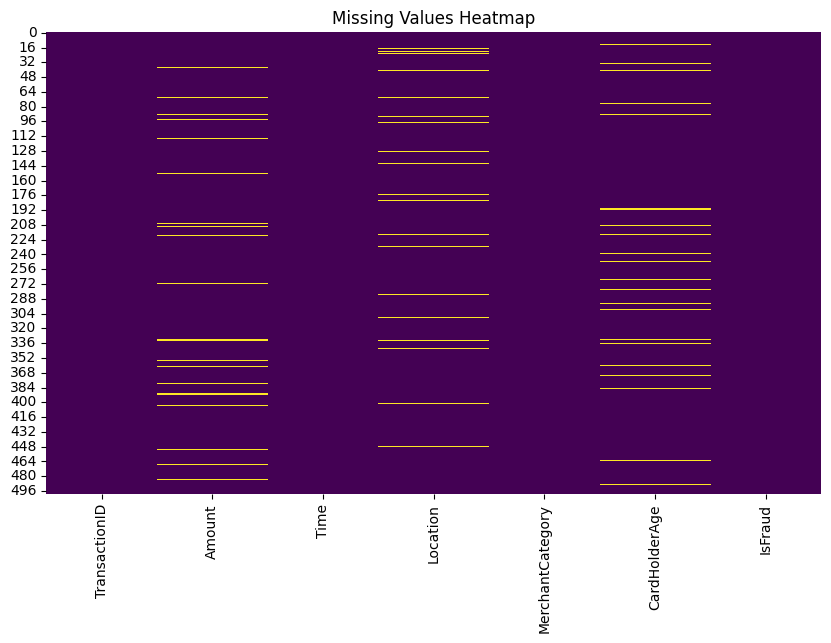


=== Fraud Class Counts ===
IsFraud
0    473
1     27
Name: count, dtype: int64

=== Fraud Ratio ===
Fraud Ratio: 5.40%


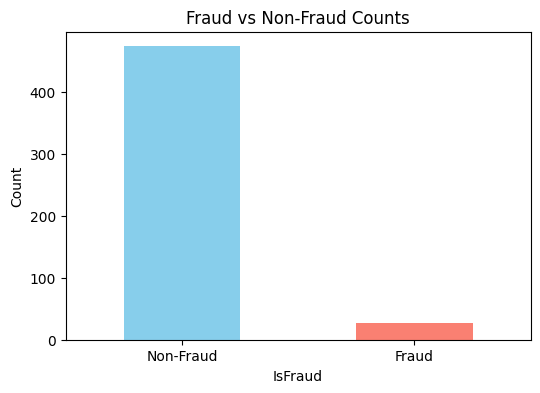


=== Fraud Class Proportion ===
IsFraud
0    0.946
1    0.054
Name: Proportion, dtype: float64

=== Unique Values in Categorical Columns ===
Location: 5 unique values
Location
Miami          104
Chicago        104
Los Angeles     97
New York        90
Houston         80
Name: count, dtype: int64

MerchantCategory: 5 unique values
MerchantCategory
Groceries        110
Entertainment    109
Electronics      103
Travel           100
Clothing          78
Name: count, dtype: int64



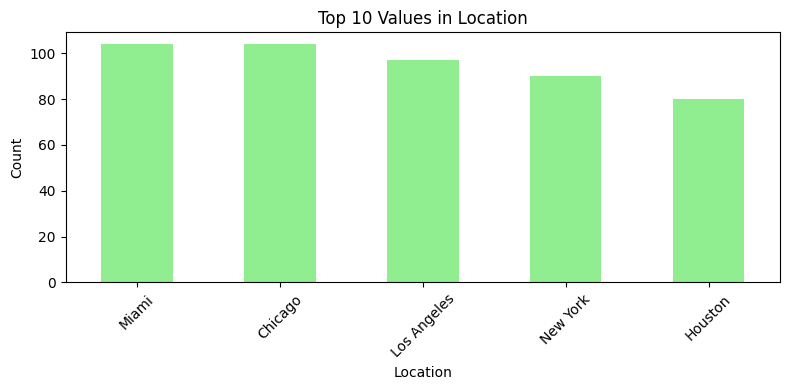

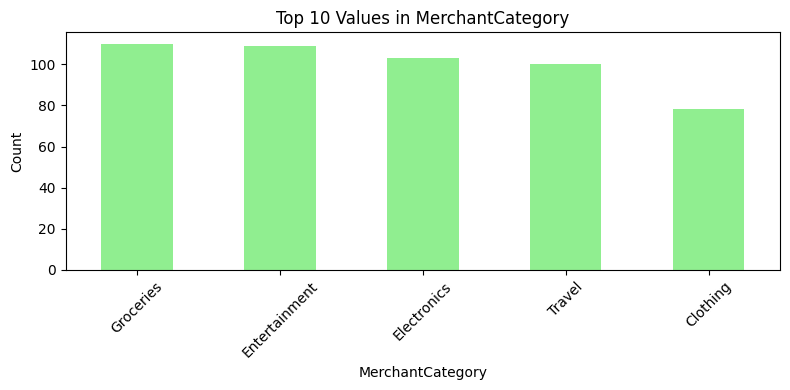

In [ ]:
# Step 1: Imports
import pandas as pd
import numpy as np
import io
from google.colab import files
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2: Upload and Load Dataset
uploaded = files.upload()
filename = list(uploaded.keys())[0]
df = pd.read_csv(io.BytesIO(uploaded[filename]))

# Step 3: Preview Data
print("\n=== First 10 Rows ===")
print(df.head(10))

# Step 4: Dataset Info
print("\n=== Dataset Info ===")
print(df.info())

# Step 5: Summary Statistics
print("\n=== Summary Statistics ===")
print(df.describe(include='all'))

# Step 6: Missing Values
print("\n=== Missing Values ===")
print(df.isnull().sum())

# Step 6a: Missing Values Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()

# Step 7: Fraud Class Distribution (Count + Ratio)
fraud_counts = df['IsFraud'].value_counts()
print("\n=== Fraud Class Counts ===")
print(fraud_counts)

fraud_ratio = 100 * fraud_counts[1] / fraud_counts.sum()
print("\n=== Fraud Ratio ===")
print(f"Fraud Ratio: {fraud_ratio:.2f}%")

# Step 7a: Fraud Distribution Bar Chart
plt.figure(figsize=(6, 4))
fraud_counts.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title("Fraud vs Non-Fraud Counts")
plt.xlabel("IsFraud")
plt.ylabel("Count")
plt.xticks([0, 1], ['Non-Fraud', 'Fraud'], rotation=0)
plt.show()

# Step 8: Fraud Class Proportion
fraud_proportion = df['IsFraud'].value_counts(normalize=True).rename("Proportion")
print("\n=== Fraud Class Proportion ===")
print(fraud_proportion)

# Step 9: Unique Categorical Values
categorical_cols = df.select_dtypes(include='object').columns.tolist()
print("\n=== Unique Values in Categorical Columns ===")
for col in categorical_cols:
    print(f"{col}: {df[col].nunique()} unique values")
    print(df[col].value_counts().head(10))
    print()

# Step 9a: Categorical Distribution Charts
for col in categorical_cols:
    plt.figure(figsize=(8, 4))
    df[col].value_counts().head(10).plot(kind='bar', color='lightgreen')
    plt.title(f"Top 10 Values in {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

**Train-Test Split + Stats + Visualization + CSV Download**


Total samples: 500
Training samples: 350
Testing samples: 150

=== Training Set Class Distribution ===
IsFraud
0    331
1     19
Name: count, dtype: int64

=== Testing Set Class Distribution ===
IsFraud
0    142
1      8
Name: count, dtype: int64

=== Training Set Class Ratio (%) ===
IsFraud
0    94.57
1     5.43
Name: proportion, dtype: float64

=== Testing Set Class Ratio (%) ===
IsFraud
0    94.67
1     5.33
Name: proportion, dtype: float64


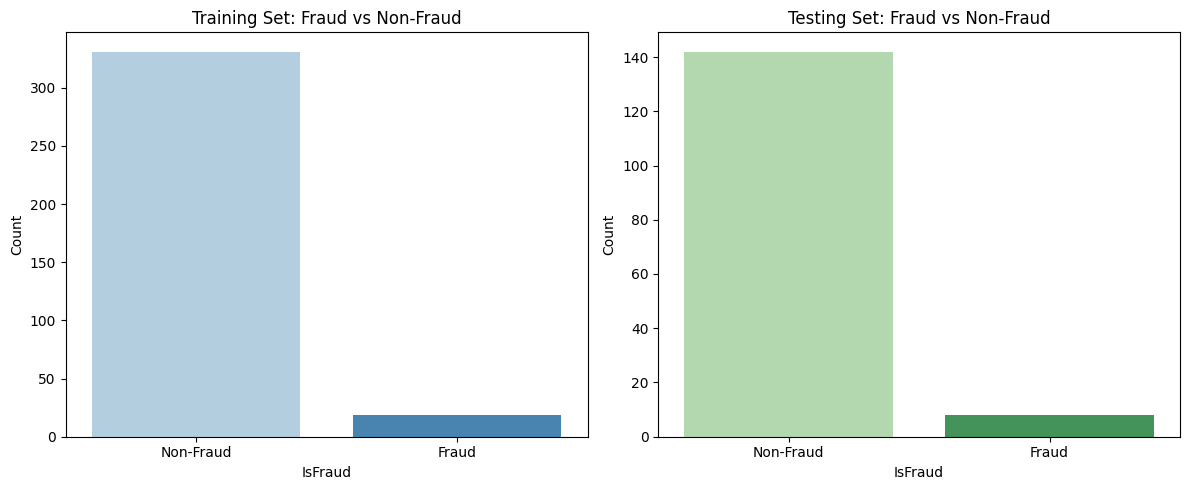

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Step 1: Split Features and Target
X = df.drop('IsFraud', axis=1)
y = df['IsFraud']

# Step 2: Stratified Train-Test Split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)

# Step 3: Combine for Analysis
train_df = pd.concat([X_train, y_train.rename("IsFraud")], axis=1)
test_df = pd.concat([X_test, y_test.rename("IsFraud")], axis=1)

# Step 4: Print Sample Counts
print(f"\nTotal samples: {len(df)}")
print(f"Training samples: {len(train_df)}")
print(f"Testing samples: {len(test_df)}")

# Step 5: Class Distribution Counts
print("\n=== Training Set Class Distribution ===")
print(train_df['IsFraud'].value_counts())

print("\n=== Testing Set Class Distribution ===")
print(test_df['IsFraud'].value_counts())

# Step 6: Class Distribution Ratios
train_ratio = train_df['IsFraud'].value_counts(normalize=True) * 100
test_ratio = test_df['IsFraud'].value_counts(normalize=True) * 100

print("\n=== Training Set Class Ratio (%) ===")
print(train_ratio.round(2))

print("\n=== Testing Set Class Ratio (%) ===")
print(test_ratio.round(2))

# Step 7: Visualize Class Distribution (Warning-Free)
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Training set plot
sns.countplot(x='IsFraud', data=train_df, ax=axes[0], hue='IsFraud', palette='Blues', legend=False)
axes[0].set_title("Training Set: Fraud vs Non-Fraud")
axes[0].set_xlabel("IsFraud")
axes[0].set_ylabel("Count")
axes[0].set_xticks([0, 1])
axes[0].set_xticklabels(['Non-Fraud', 'Fraud'])

# Testing set plot
sns.countplot(x='IsFraud', data=test_df, ax=axes[1], hue='IsFraud', palette='Greens', legend=False)
axes[1].set_title("Testing Set: Fraud vs Non-Fraud")
axes[1].set_xlabel("IsFraud")
axes[1].set_ylabel("Count")
axes[1].set_xticks([0, 1])
axes[1].set_xticklabels(['Non-Fraud', 'Fraud'])

plt.tight_layout()
plt.show()

# Step 8: Save CSVs
train_df.to_csv("train_data.csv", index=False)
test_df.to_csv("test_data.csv", index=False)

# Step 9: Download CSVs (Colab only)
from google.colab import files
files.download("train_data.csv")
files.download("test_data.csv")

**Upload Training CSV → Encode → SMOTE → Visualize**

Saving train_data.csv to train_data (4).csv

=== Resampled Training Set Class Distribution ===
IsFraud
0    331
1    331
Name: count, dtype: int64


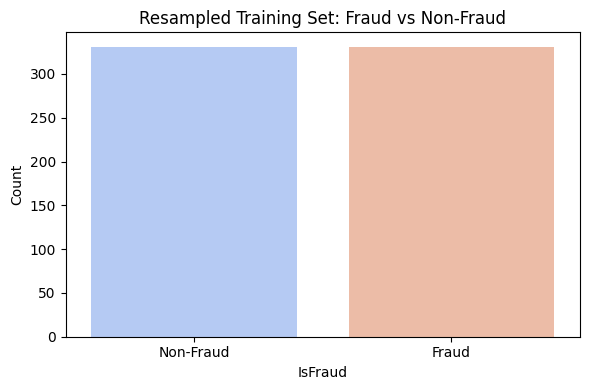

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# 📦 Step 1: Imports
import pandas as pd
import io
from google.colab import files
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE

# 📁 Step 2: Upload Training CSV
uploaded = files.upload()
train_filename = list(uploaded.keys())[0]
train_df = pd.read_csv(io.BytesIO(uploaded[train_filename]))

# ✂️ Step 3: Split Features and Target
X_train = train_df.drop('IsFraud', axis=1)
y_train = train_df['IsFraud']

# 🧼 Step 4: Impute Missing Values (Warning-Free)
for col in X_train.columns:
    if X_train[col].dtype == 'object':
        X_train[col] = X_train[col].fillna(X_train[col].mode()[0])
    else:
        X_train[col] = X_train[col].fillna(X_train[col].median())

# 🔤 Step 5: Encode Categorical Features
categorical_cols = X_train.select_dtypes(include='object').columns.tolist()
X_encoded = pd.get_dummies(X_train, columns=categorical_cols, drop_first=True)

# ⚖️ Step 6: Apply SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_encoded, y_train)

# 📊 Step 7: Visualize Resampled Class Distribution
resampled_counts = pd.Series(y_resampled).value_counts()
print("\n=== Resampled Training Set Class Distribution ===")
print(resampled_counts)

plt.figure(figsize=(6, 4))
sns.countplot(x=y_resampled, hue=y_resampled, palette='coolwarm', legend=False)
plt.title("Resampled Training Set: Fraud vs Non-Fraud")
plt.xlabel("IsFraud")
plt.ylabel("Count")
plt.xticks([0, 1], ['Non-Fraud', 'Fraud'])
plt.tight_layout()
plt.show()

# 💾 Step 8: Save and Download Balanced Training CSV
balanced_df = pd.DataFrame(X_resampled)
balanced_df['IsFraud'] = y_resampled
balanced_df.to_csv("balanced_train_data.csv", index=False)
files.download("balanced_train_data.csv")

**Preprocess + Download Test Set**

Saving test_data.csv to test_data (1).csv

=== Test Set Class Distribution ===
IsFraud
0    142
1      8
Name: count, dtype: int64


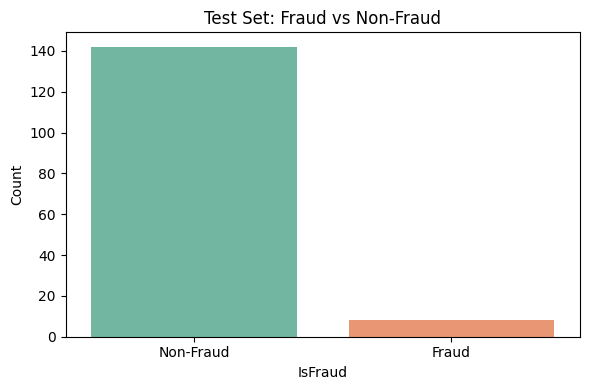

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# 📦 Step 1: Imports
import pandas as pd
import io
from google.colab import files
import matplotlib.pyplot as plt
import seaborn as sns

# 📁 Step 2: Upload Test CSV
uploaded = files.upload()
test_filename = list(uploaded.keys())[0]
test_df = pd.read_csv(io.BytesIO(uploaded[test_filename]))

# ✂️ Step 3: Split Features and Target
X_test = test_df.drop('IsFraud', axis=1)
y_test = test_df['IsFraud']

# 🧼 Step 4: Impute Missing Values (Warning-Free)
for col in X_test.columns:
    if X_test[col].dtype == 'object':
        X_test[col] = X_test[col].fillna(X_test[col].mode()[0])
    else:
        X_test[col] = X_test[col].fillna(X_test[col].median())

# 🔤 Step 5: Encode Categorical Features
categorical_cols = X_test.select_dtypes(include='object').columns.tolist()
X_test_encoded = pd.get_dummies(X_test, columns=categorical_cols, drop_first=True)

# 📊 Step 6: Visualize Class Distribution
print("\n=== Test Set Class Distribution ===")
print(y_test.value_counts())

plt.figure(figsize=(6, 4))
sns.countplot(x=y_test, hue=y_test, palette='Set2', legend=False)
plt.title("Test Set: Fraud vs Non-Fraud")
plt.xlabel("IsFraud")
plt.ylabel("Count")
plt.xticks([0, 1], ['Non-Fraud', 'Fraud'])
plt.tight_layout()
plt.show()

# 💾 Step 7: Save and Download Preprocessed Test CSV
preprocessed_test_df = pd.DataFrame(X_test_encoded)
preprocessed_test_df['IsFraud'] = y_test.values
preprocessed_test_df.to_csv("preprocessed_test_data.csv", index=False)
files.download("preprocessed_test_data.csv")

**Feature Engineering for Train & Test + Download**

In [ ]:
# 📦 Step 1: Imports
import pandas as pd
import io
from google.colab import files
import matplotlib.pyplot as plt
import seaborn as sns

# 📁 Step 2: Upload TRAINING CSV
print("📁 Please upload your balanced training data CSV file now.")
uploaded_train = files.upload()
train_filename = list(uploaded_train.keys())[0]
train_df = pd.read_csv(io.BytesIO(uploaded_train[train_filename]))

# ✂️ Step 3: Split Features and Target
X_train = train_df.drop('IsFraud', axis=1)
y_train = train_df['IsFraud']

# 🧼 Step 4: Impute Missing Values (Warning-Free)
X_train = X_train.apply(lambda col: col.fillna(col.mode()[0]) if col.dtype == 'object' else col.fillna(col.median()))

# 🔤 Step 5: Encode Categorical Features
categorical_cols = X_train.select_dtypes(include='object').columns.tolist()
X_train_encoded = pd.get_dummies(X_train, columns=categorical_cols, drop_first=True)

# 🧠 Step 6: Feature Engineering (TRAIN)
amt_col = next((col for col in X_train_encoded.columns if 'amt' in col.lower()), None)
hour_col = next((col for col in X_train_encoded.columns if 'hour' in col.lower()), None)

if amt_col:
    X_train_encoded['AmtToMean'] = X_train_encoded[amt_col] / X_train_encoded[amt_col].mean()
    X_train_encoded['AmtToMedian'] = X_train_encoded[amt_col] / X_train_encoded[amt_col].median()

if hour_col:
    X_train_encoded['IsNight'] = X_train_encoded[hour_col].apply(lambda x: 1 if x < 6 or x > 22 else 0)

# 💾 Step 7: Save and Download TRAIN
train_fe_df = X_train_encoded.copy()
train_fe_df['IsFraud'] = y_train.values
train_fe_df.to_csv("feature_engineered_train.csv", index=False)
files.download("feature_engineered_train.csv")

# 📁 Step 8: Upload TEST CSV
print("📁 Please upload your preprocessed test data CSV file now.")
uploaded_test = files.upload()
test_filename = list(uploaded_test.keys())[0]
test_df = pd.read_csv(io.BytesIO(uploaded_test[test_filename]))

# ✂️ Step 9: Split Features and Target
X_test = test_df.drop('IsFraud', axis=1)
y_test = test_df['IsFraud']

# 🧼 Step 10: Impute Missing Values (Warning-Free)
X_test = X_test.apply(lambda col: col.fillna(col.mode()[0]) if col.dtype == 'object' else col.fillna(col.median()))

# 🔤 Step 11: Encode Categorical Features
categorical_cols_test = X_test.select_dtypes(include='object').columns.tolist()
X_test_encoded = pd.get_dummies(X_test, columns=categorical_cols_test, drop_first=True)

# 🧠 Step 12: Feature Engineering (TEST) — same logic as train
if amt_col and amt_col in X_test_encoded.columns:
    X_test_encoded['AmtToMean'] = X_test_encoded[amt_col] / X_train_encoded[amt_col].mean()
    X_test_encoded['AmtToMedian'] = X_test_encoded[amt_col] / X_train_encoded[amt_col].median()

if hour_col and hour_col in X_test_encoded.columns:
    X_test_encoded['IsNight'] = X_test_encoded[hour_col].apply(lambda x: 1 if x < 6 or x > 22 else 0)

# 💾 Step 13: Save and Download TEST
test_fe_df = X_test_encoded.copy()
test_fe_df['IsFraud'] = y_test.values
test_fe_df.to_csv("feature_engineered_test.csv", index=False)
files.download("feature_engineered_test.csv")

📁 Please upload your balanced training data CSV file now.


Saving balanced_train_data.csv to balanced_train_data (2).csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

📁 Please upload your preprocessed test data CSV file now.


Saving preprocessed_test_data.csv to preprocessed_test_data (1).csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**Logistic regression**

Saving feature_engineered_merged.csv to feature_engineered_merged (3).csv


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



✅ Best Hyperparameters:
{'C': 10, 'class_weight': 'balanced', 'max_iter': 2000, 'solver': 'lbfgs'}


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



=== Fold 1 ===
Train Accuracy: 0.8074, Test Accuracy (0.5): 0.8098
ROC AUC: 0.8859, PR AUC: 0.8806, Optimal Threshold: 0.55

📊 Classification Report (Threshold = 0.5)
              precision    recall  f1-score   support

           0       0.84      0.83      0.84        95
           1       0.77      0.78      0.77        68

    accuracy                           0.81       163
   macro avg       0.80      0.81      0.80       163
weighted avg       0.81      0.81      0.81       163


📊 Classification Report (Threshold = F1-max)
              precision    recall  f1-score   support

           0       0.84      0.88      0.86        95
           1       0.83      0.76      0.79        68

    accuracy                           0.83       163
   macro avg       0.83      0.82      0.83       163
weighted avg       0.83      0.83      0.83       163



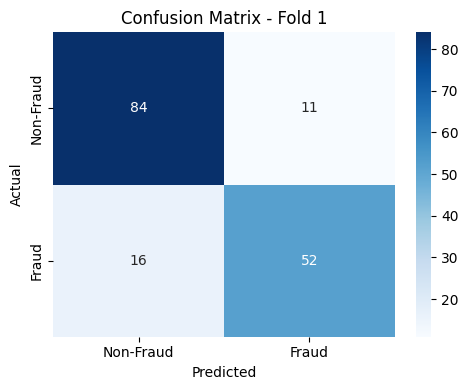

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



=== Fold 2 ===
Train Accuracy: 0.8120, Test Accuracy (0.5): 0.7914
ROC AUC: 0.8786, PR AUC: 0.8711, Optimal Threshold: 0.52

📊 Classification Report (Threshold = 0.5)
              precision    recall  f1-score   support

           0       0.83      0.81      0.82        95
           1       0.74      0.76      0.75        68

    accuracy                           0.79       163
   macro avg       0.79      0.79      0.79       163
weighted avg       0.79      0.79      0.79       163


📊 Classification Report (Threshold = F1-max)
              precision    recall  f1-score   support

           0       0.82      0.83      0.83        95
           1       0.76      0.75      0.76        68

    accuracy                           0.80       163
   macro avg       0.79      0.79      0.79       163
weighted avg       0.80      0.80      0.80       163



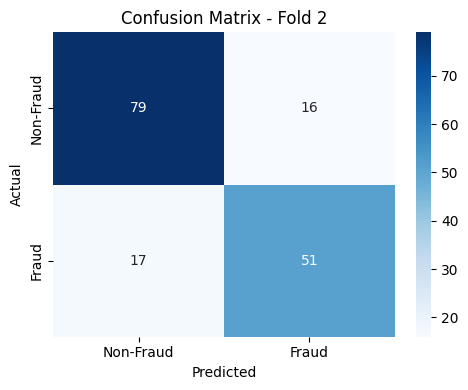

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



=== Fold 3 ===
Train Accuracy: 0.7985, Test Accuracy (0.5): 0.8333
ROC AUC: 0.8984, PR AUC: 0.9074, Optimal Threshold: 0.57

📊 Classification Report (Threshold = 0.5)
              precision    recall  f1-score   support

           0       0.84      0.88      0.86        95
           1       0.82      0.76      0.79        67

    accuracy                           0.83       162
   macro avg       0.83      0.82      0.83       162
weighted avg       0.83      0.83      0.83       162


📊 Classification Report (Threshold = F1-max)
              precision    recall  f1-score   support

           0       0.84      0.96      0.90        95
           1       0.93      0.75      0.83        67

    accuracy                           0.87       162
   macro avg       0.88      0.85      0.86       162
weighted avg       0.88      0.87      0.87       162



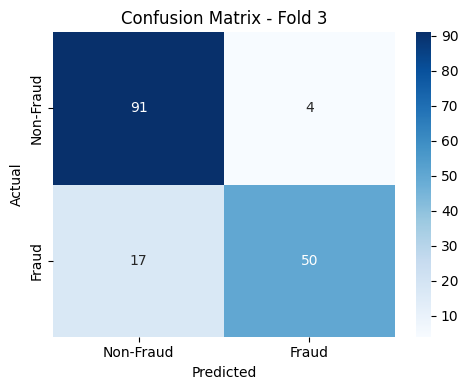

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



=== Fold 4 ===
Train Accuracy: 0.7908, Test Accuracy (0.5): 0.8457
ROC AUC: 0.9244, PR AUC: 0.9192, Optimal Threshold: 0.60

📊 Classification Report (Threshold = 0.5)
              precision    recall  f1-score   support

           0       0.92      0.81      0.86        94
           1       0.77      0.90      0.83        68

    accuracy                           0.85       162
   macro avg       0.84      0.85      0.84       162
weighted avg       0.86      0.85      0.85       162


📊 Classification Report (Threshold = F1-max)
              precision    recall  f1-score   support

           0       0.90      0.87      0.89        94
           1       0.83      0.87      0.85        68

    accuracy                           0.87       162
   macro avg       0.87      0.87      0.87       162
weighted avg       0.87      0.87      0.87       162



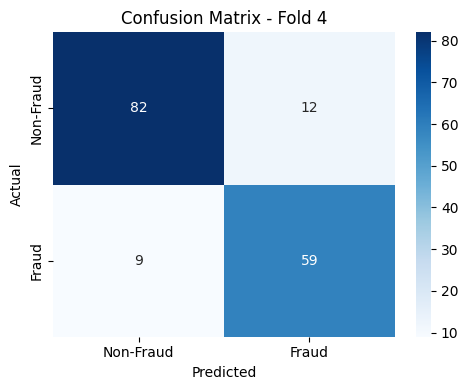

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



=== Fold 5 ===
Train Accuracy: 0.8262, Test Accuracy (0.5): 0.7099
ROC AUC: 0.7949, PR AUC: 0.7960, Optimal Threshold: 0.63

📊 Classification Report (Threshold = 0.5)
              precision    recall  f1-score   support

           0       0.77      0.71      0.74        94
           1       0.64      0.71      0.67        68

    accuracy                           0.71       162
   macro avg       0.71      0.71      0.71       162
weighted avg       0.72      0.71      0.71       162


📊 Classification Report (Threshold = F1-max)
              precision    recall  f1-score   support

           0       0.77      0.81      0.79        94
           1       0.71      0.66      0.69        68

    accuracy                           0.75       162
   macro avg       0.74      0.74      0.74       162
weighted avg       0.75      0.75      0.75       162



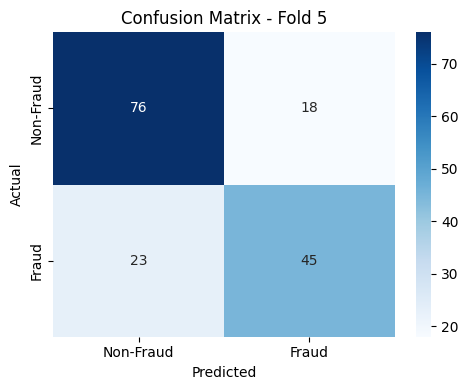


=== Cross-Validated Metrics ===
Mean ROC AUC: 0.8764 ± 0.0437
Mean PR AUC: 0.8749 ± 0.0431
Mean Optimal Threshold: 0.57


In [ ]:
# 📦 Imports
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.metrics import (
    classification_report, roc_auc_score, average_precision_score,
    precision_recall_curve, roc_curve, confusion_matrix
)
import matplotlib.pyplot as plt
import seaborn as sns

# 📁 Upload merged CSV
from google.colab import files
uploaded = files.upload()
import io
filename = list(uploaded.keys())[0]
df = pd.read_csv(io.BytesIO(uploaded[filename]))

# ✂️ Split features and target
X = df.drop('IsFraud', axis=1)
y = df['IsFraud']

# 🔍 Grid Search Setup
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['lbfgs'],
    'max_iter': [2000],
    'class_weight': ['balanced']
}
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

grid = GridSearchCV(
    LogisticRegression(),
    param_grid,
    scoring='average_precision',
    cv=skf,
    n_jobs=-1,
    verbose=0
)
grid.fit(X, y)

# ✅ Best Parameters
best_params = grid.best_params_
print("\n✅ Best Hyperparameters:")
print(best_params)

# 🔁 Stratified K-Fold with Best Params
roc_aucs, pr_aucs, f1_thresholds = [], [], []

for fold, (train_idx, val_idx) in enumerate(skf.split(X, y), 1):
    X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
    y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]

    model = LogisticRegression(**best_params, random_state=42)
    model.fit(X_train, y_train)

    y_proba = model.predict_proba(X_val)[:, 1]
    y_pred_default = (y_proba >= 0.5).astype(int)

    train_acc = model.score(X_train, y_train)
    test_acc = model.score(X_val, y_val)

    roc_auc = roc_auc_score(y_val, y_proba)
    pr_auc = average_precision_score(y_val, y_proba)
    roc_aucs.append(roc_auc)
    pr_aucs.append(pr_auc)

    precision, recall, thresholds = precision_recall_curve(y_val, y_proba)
    f1_scores = 2 * (precision * recall) / (precision + recall + 1e-6)
    best_idx = np.argmax(f1_scores)
    best_threshold = thresholds[best_idx]
    f1_thresholds.append(best_threshold)
    y_pred_adjusted = (y_proba >= best_threshold).astype(int)

    print(f"\n=== Fold {fold} ===")
    print(f"Train Accuracy: {train_acc:.4f}, Test Accuracy (0.5): {test_acc:.4f}")
    print(f"ROC AUC: {roc_auc:.4f}, PR AUC: {pr_auc:.4f}, Optimal Threshold: {best_threshold:.2f}")

    print("\n📊 Classification Report (Threshold = 0.5)")
    print(classification_report(y_val, y_pred_default))

    print("\n📊 Classification Report (Threshold = F1-max)")
    print(classification_report(y_val, y_pred_adjusted))

    cm = confusion_matrix(y_val, y_pred_adjusted)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'])
    plt.title(f'Confusion Matrix - Fold {fold}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.tight_layout()
    plt.show()

# 📊 Aggregated Metrics
print("\n=== Cross-Validated Metrics ===")
print(f"Mean ROC AUC: {np.mean(roc_aucs):.4f} ± {np.std(roc_aucs):.4f}")
print(f"Mean PR AUC: {np.mean(pr_aucs):.4f} ± {np.std(pr_aucs):.4f}")
print(f"Mean Optimal Threshold: {np.mean(f1_thresholds):.2f}")

Saving feature_engineered_merged.csv to feature_engineered_merged (4).csv

✅ Best Hyperparameters:
{'class_weight': 'balanced', 'max_depth': 8, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}

=== Fold 1 ===
Train Accuracy: 0.9800, Test Accuracy (0.5): 0.9571
ROC AUC: 0.9796, PR AUC: 0.9804, Optimal Threshold: 0.46

📊 Classification Report (Threshold = 0.5)
              precision    recall  f1-score   support

           0       0.97      0.96      0.96        95
           1       0.94      0.96      0.95        68

    accuracy                           0.96       163
   macro avg       0.96      0.96      0.96       163
weighted avg       0.96      0.96      0.96       163


📊 Classification Report (Threshold = F1-max)
              precision    recall  f1-score   support

           0       0.98      0.95      0.96        95
           1       0.93      0.97      0.95        68

    accuracy                           0.96       163
   macro avg       0.95      

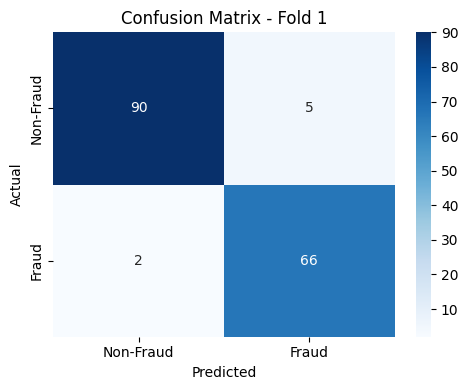


=== Fold 2 ===
Train Accuracy: 0.9784, Test Accuracy (0.5): 0.9325
ROC AUC: 0.9768, PR AUC: 0.9758, Optimal Threshold: 0.46

📊 Classification Report (Threshold = 0.5)
              precision    recall  f1-score   support

           0       0.94      0.95      0.94        95
           1       0.93      0.91      0.92        68

    accuracy                           0.93       163
   macro avg       0.93      0.93      0.93       163
weighted avg       0.93      0.93      0.93       163


📊 Classification Report (Threshold = F1-max)
              precision    recall  f1-score   support

           0       0.96      0.95      0.95        95
           1       0.93      0.94      0.93        68

    accuracy                           0.94       163
   macro avg       0.94      0.94      0.94       163
weighted avg       0.94      0.94      0.94       163



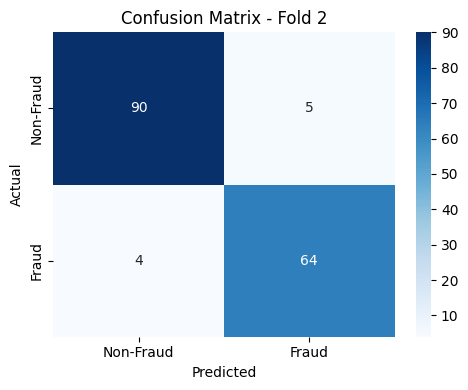


=== Fold 3 ===
Train Accuracy: 0.9800, Test Accuracy (0.5): 0.9383
ROC AUC: 0.9766, PR AUC: 0.9782, Optimal Threshold: 0.48

📊 Classification Report (Threshold = 0.5)
              precision    recall  f1-score   support

           0       0.94      0.96      0.95        95
           1       0.94      0.91      0.92        67

    accuracy                           0.94       162
   macro avg       0.94      0.93      0.94       162
weighted avg       0.94      0.94      0.94       162


📊 Classification Report (Threshold = F1-max)
              precision    recall  f1-score   support

           0       0.96      0.96      0.96        95
           1       0.94      0.94      0.94        67

    accuracy                           0.95       162
   macro avg       0.95      0.95      0.95       162
weighted avg       0.95      0.95      0.95       162



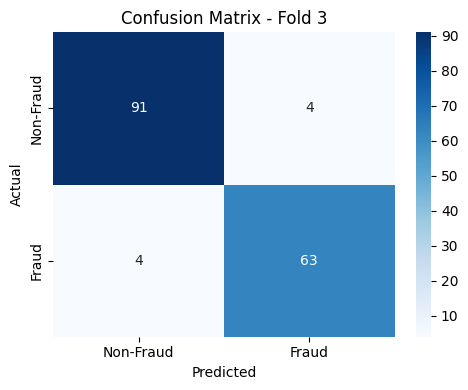


=== Fold 4 ===
Train Accuracy: 0.9723, Test Accuracy (0.5): 0.9630
ROC AUC: 0.9870, PR AUC: 0.9812, Optimal Threshold: 0.65

📊 Classification Report (Threshold = 0.5)
              precision    recall  f1-score   support

           0       0.99      0.95      0.97        94
           1       0.93      0.99      0.96        68

    accuracy                           0.96       162
   macro avg       0.96      0.97      0.96       162
weighted avg       0.96      0.96      0.96       162


📊 Classification Report (Threshold = F1-max)
              precision    recall  f1-score   support

           0       0.99      0.98      0.98        94
           1       0.97      0.99      0.98        68

    accuracy                           0.98       162
   macro avg       0.98      0.98      0.98       162
weighted avg       0.98      0.98      0.98       162



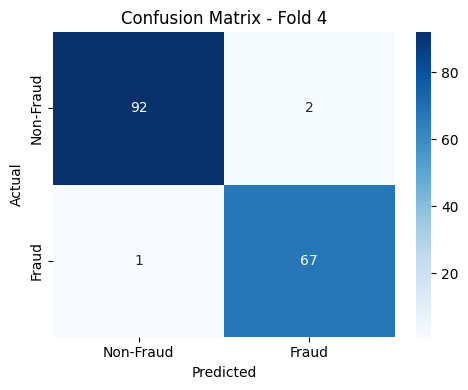


=== Fold 5 ===
Train Accuracy: 0.9800, Test Accuracy (0.5): 0.9198
ROC AUC: 0.9589, PR AUC: 0.9681, Optimal Threshold: 0.61

📊 Classification Report (Threshold = 0.5)
              precision    recall  f1-score   support

           0       0.93      0.94      0.93        94
           1       0.91      0.90      0.90        68

    accuracy                           0.92       162
   macro avg       0.92      0.92      0.92       162
weighted avg       0.92      0.92      0.92       162


📊 Classification Report (Threshold = F1-max)
              precision    recall  f1-score   support

           0       0.93      0.97      0.95        94
           1       0.95      0.90      0.92        68

    accuracy                           0.94       162
   macro avg       0.94      0.93      0.94       162
weighted avg       0.94      0.94      0.94       162



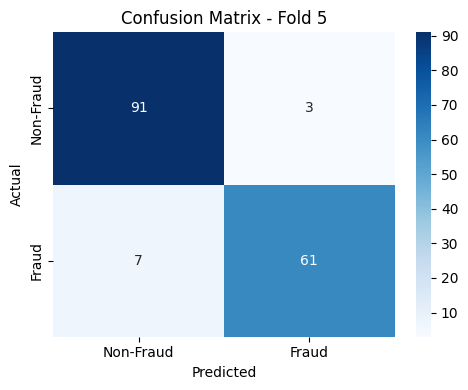


=== Cross-Validated Metrics ===
Mean ROC AUC: 0.9758 ± 0.0093
Mean PR AUC: 0.9768 ± 0.0047
Mean Optimal Threshold: 0.53


In [ ]:
# 📦 Imports
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.metrics import (
    classification_report, roc_auc_score, average_precision_score,
    precision_recall_curve, roc_curve, confusion_matrix
)
import matplotlib.pyplot as plt
import seaborn as sns

# 📁 Upload merged CSV
from google.colab import files
uploaded = files.upload()
import io
filename = list(uploaded.keys())[0]
df = pd.read_csv(io.BytesIO(uploaded[filename]))

# ✂️ Split features and target
X = df.drop('IsFraud', axis=1)
y = df['IsFraud']

# 🔍 Grid Search Setup
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [4, 6, 8],
    'min_samples_split': [5, 10],
    'min_samples_leaf': [2, 5],
    'class_weight': ['balanced']
}
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

grid = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid,
    scoring='average_precision',
    cv=skf,
    n_jobs=-1,
    verbose=0
)
grid.fit(X, y)

# ✅ Best Parameters
best_params = grid.best_params_
print("\n✅ Best Hyperparameters:")
print(best_params)

# 🔁 Stratified K-Fold with Best Params
roc_aucs, pr_aucs, f1_thresholds = [], [], []

for fold, (train_idx, val_idx) in enumerate(skf.split(X, y), 1):
    X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
    y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]

    model = RandomForestClassifier(**best_params, random_state=42)
    model.fit(X_train, y_train)

    y_proba = model.predict_proba(X_val)[:, 1]
    y_pred_default = (y_proba >= 0.5).astype(int)

    train_acc = model.score(X_train, y_train)
    test_acc = model.score(X_val, y_val)

    roc_auc = roc_auc_score(y_val, y_proba)
    pr_auc = average_precision_score(y_val, y_proba)
    roc_aucs.append(roc_auc)
    pr_aucs.append(pr_auc)

    precision, recall, thresholds = precision_recall_curve(y_val, y_proba)
    f1_scores = 2 * (precision * recall) / (precision + recall + 1e-6)
    best_idx = np.argmax(f1_scores)
    best_threshold = thresholds[best_idx]
    f1_thresholds.append(best_threshold)
    y_pred_adjusted = (y_proba >= best_threshold).astype(int)

    print(f"\n=== Fold {fold} ===")
    print(f"Train Accuracy: {train_acc:.4f}, Test Accuracy (0.5): {test_acc:.4f}")
    print(f"ROC AUC: {roc_auc:.4f}, PR AUC: {pr_auc:.4f}, Optimal Threshold: {best_threshold:.2f}")

    print("\n📊 Classification Report (Threshold = 0.5)")
    print(classification_report(y_val, y_pred_default))

    print("\n📊 Classification Report (Threshold = F1-max)")
    print(classification_report(y_val, y_pred_adjusted))

    cm = confusion_matrix(y_val, y_pred_adjusted)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'])
    plt.title(f'Confusion Matrix - Fold {fold}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.tight_layout()
    plt.show()

# 📊 Aggregated Metrics
print("\n=== Cross-Validated Metrics ===")
print(f"Mean ROC AUC: {np.mean(roc_aucs):.4f} ± {np.std(roc_aucs):.4f}")
print(f"Mean PR AUC: {np.mean(pr_aucs):.4f} ± {np.std(pr_aucs):.4f}")
print(f"Mean Optimal Threshold: {np.mean(f1_thresholds):.2f}")


**XGBoost**

📤 Please upload your feature-engineered CSV file


Saving feature_engineered_merged.csv to feature_engineered_merged (1).csv

=== Fold 1 ===
Train Accuracy: 0.9599, Test Accuracy (0.5): 0.9387
ROC AUC: 0.9715, PR AUC: 0.9748, Optimal Threshold: 0.57

📊 Classification Report (Threshold = 0.5)
              precision    recall  f1-score   support

           0       0.96      0.94      0.95        95
           1       0.91      0.94      0.93        68

    accuracy                           0.94       163
   macro avg       0.94      0.94      0.94       163
weighted avg       0.94      0.94      0.94       163


📊 Classification Report (Threshold = F1-max)
              precision    recall  f1-score   support

           0       0.96      0.96      0.96        95
           1       0.94      0.94      0.94        68

    accuracy                           0.95       163
   macro avg       0.95      0.95      0.95       163
weighted avg       0.95      0.95      0.95       163



/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [11:26:07] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


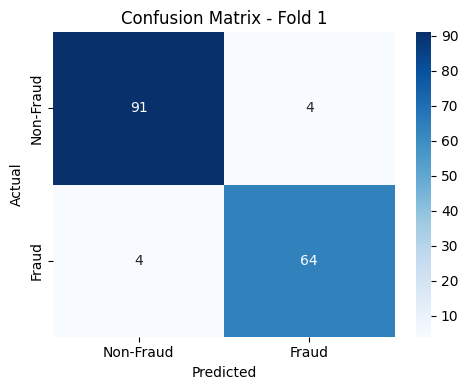


=== Fold 2 ===
Train Accuracy: 0.9630, Test Accuracy (0.5): 0.9080
ROC AUC: 0.9684, PR AUC: 0.9591, Optimal Threshold: 0.37

📊 Classification Report (Threshold = 0.5)
              precision    recall  f1-score   support

           0       0.92      0.93      0.92        95
           1       0.90      0.88      0.89        68

    accuracy                           0.91       163
   macro avg       0.91      0.90      0.91       163
weighted avg       0.91      0.91      0.91       163


📊 Classification Report (Threshold = F1-max)
              precision    recall  f1-score   support

           0       0.98      0.89      0.93        95
           1       0.87      0.97      0.92        68

    accuracy                           0.93       163
   macro avg       0.92      0.93      0.93       163
weighted avg       0.93      0.93      0.93       163



/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [11:26:07] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


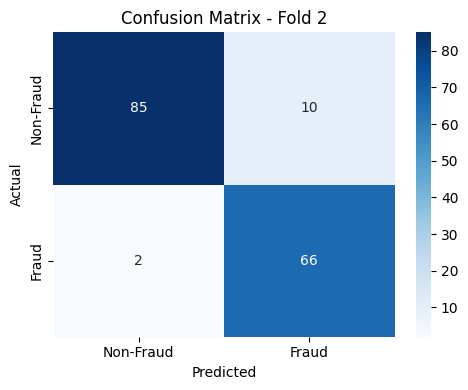

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [11:26:07] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



=== Fold 3 ===
Train Accuracy: 0.9631, Test Accuracy (0.5): 0.9444
ROC AUC: 0.9662, PR AUC: 0.9660, Optimal Threshold: 0.50

📊 Classification Report (Threshold = 0.5)
              precision    recall  f1-score   support

           0       0.93      0.98      0.95        95
           1       0.97      0.90      0.93        67

    accuracy                           0.94       162
   macro avg       0.95      0.94      0.94       162
weighted avg       0.95      0.94      0.94       162


📊 Classification Report (Threshold = F1-max)
              precision    recall  f1-score   support

           0       0.94      0.98      0.96        95
           1       0.97      0.91      0.94        67

    accuracy                           0.95       162
   macro avg       0.95      0.94      0.95       162
weighted avg       0.95      0.95      0.95       162



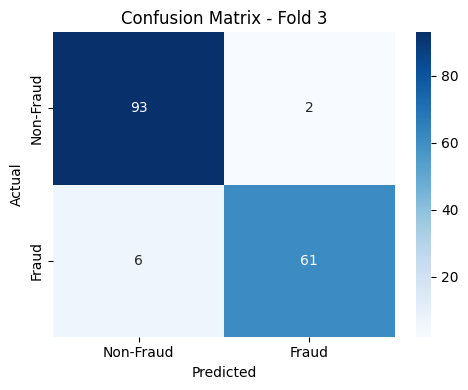

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [11:26:07] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



=== Fold 4 ===
Train Accuracy: 0.9615, Test Accuracy (0.5): 0.9506
ROC AUC: 0.9778, PR AUC: 0.9562, Optimal Threshold: 0.64

📊 Classification Report (Threshold = 0.5)
              precision    recall  f1-score   support

           0       0.99      0.93      0.96        94
           1       0.91      0.99      0.94        68

    accuracy                           0.95       162
   macro avg       0.95      0.96      0.95       162
weighted avg       0.95      0.95      0.95       162


📊 Classification Report (Threshold = F1-max)
              precision    recall  f1-score   support

           0       0.99      0.96      0.97        94
           1       0.94      0.99      0.96        68

    accuracy                           0.97       162
   macro avg       0.97      0.97      0.97       162
weighted avg       0.97      0.97      0.97       162



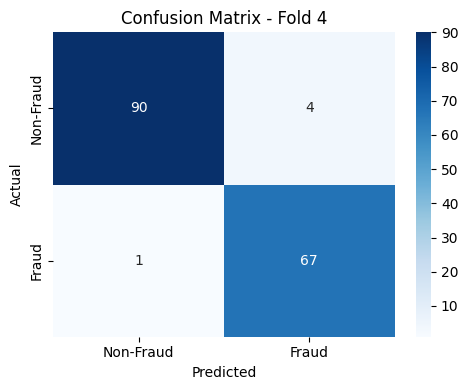


=== Fold 5 ===
Train Accuracy: 0.9646, Test Accuracy (0.5): 0.9136
ROC AUC: 0.9407, PR AUC: 0.9355, Optimal Threshold: 0.60

📊 Classification Report (Threshold = 0.5)
              precision    recall  f1-score   support

           0       0.94      0.90      0.92        94
           1       0.88      0.93      0.90        68

    accuracy                           0.91       162
   macro avg       0.91      0.92      0.91       162
weighted avg       0.92      0.91      0.91       162


📊 Classification Report (Threshold = F1-max)
              precision    recall  f1-score   support

           0       0.94      0.93      0.93        94
           1       0.90      0.91      0.91        68

    accuracy                           0.92       162
   macro avg       0.92      0.92      0.92       162
weighted avg       0.92      0.92      0.92       162



/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [11:26:08] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


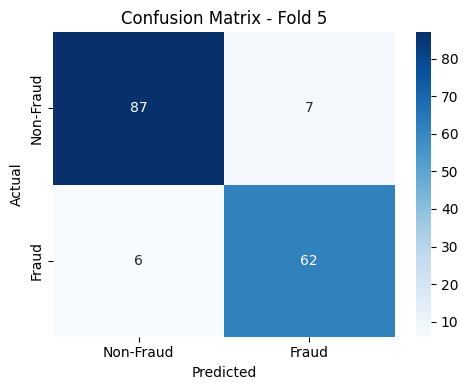


=== Cross-Validated Metrics ===
Mean ROC AUC: 0.9649 ± 0.0127
Mean PR AUC: 0.9583 ± 0.0131
Mean Optimal Threshold: 0.54


In [3]:
# 📦 Imports
import pandas as pd
import numpy as np
from xgboost import XGBClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import (
    classification_report, roc_auc_score, average_precision_score,
    precision_recall_curve, confusion_matrix
)
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
import io

# 📁 Upload CSV from local system
print("📤 Please upload your feature-engineered CSV file")
uploaded = files.upload()
filename = list(uploaded.keys())[0]
df = pd.read_csv(io.BytesIO(uploaded[filename]))

# ✂️ Split features and target
X = df.drop("IsFraud", axis=1)
y = df["IsFraud"]

# 🔁 Stratified K-Fold Setup
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
roc_aucs, pr_aucs, f1_thresholds = [], [], []

# ✅ Anti-overfitting XGB parameters
xgb_params = {
    "n_estimators": 200,
    "max_depth": 3,
    "learning_rate": 0.05,
    "subsample": 0.8,
    "colsample_bytree": 0.8,
    "min_child_weight": 5,
    "reg_alpha": 0.5,
    "reg_lambda": 2,
    "scale_pos_weight": 1,
    "use_label_encoder": False,
    "eval_metric": "logloss",
    "random_state": 42
}

# 🔁 Cross-validation loop
for fold, (train_idx, val_idx) in enumerate(skf.split(X, y), 1):
    X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
    y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]

    model = XGBClassifier(**xgb_params)
    model.fit(X_train, y_train)

    y_proba = model.predict_proba(X_val)[:, 1]
    y_pred_default = (y_proba >= 0.5).astype(int)

    train_acc = model.score(X_train, y_train)
    test_acc = model.score(X_val, y_val)

    roc_auc = roc_auc_score(y_val, y_proba)
    pr_auc = average_precision_score(y_val, y_proba)
    roc_aucs.append(roc_auc)
    pr_aucs.append(pr_auc)

    precision, recall, thresholds = precision_recall_curve(y_val, y_proba)
    f1_scores = 2 * (precision * recall) / (precision + recall + 1e-6)
    best_idx = np.argmax(f1_scores)
    best_threshold = thresholds[best_idx]
    f1_thresholds.append(best_threshold)
    y_pred_adjusted = (y_proba >= best_threshold).astype(int)

    print(f"\n=== Fold {fold} ===")
    print(f"Train Accuracy: {train_acc:.4f}, Test Accuracy (0.5): {test_acc:.4f}")
    print(f"ROC AUC: {roc_auc:.4f}, PR AUC: {pr_auc:.4f}, Optimal Threshold: {best_threshold:.2f}")

    print("\n📊 Classification Report (Threshold = 0.5)")
    print(classification_report(y_val, y_pred_default))

    print("\n📊 Classification Report (Threshold = F1-max)")
    print(classification_report(y_val, y_pred_adjusted))

    cm = confusion_matrix(y_val, y_pred_adjusted)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'])
    plt.title(f'Confusion Matrix - Fold {fold}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.tight_layout()
    plt.show()

# 📊 Aggregated Metrics
print("\n=== Cross-Validated Metrics ===")
print(f"Mean ROC AUC: {np.mean(roc_aucs):.4f} ± {np.std(roc_aucs):.4f}")
print(f"Mean PR AUC: {np.mean(pr_aucs):.4f} ± {np.std(pr_aucs):.4f}")
print(f"Mean Optimal Threshold: {np.mean(f1_thresholds):.2f}")

***CatBoost***

In [5]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 9.1 MB/s eta 0:00:00


📤 Please upload your feature-engineered CSV file


Saving feature_engineered_merged.csv to feature_engineered_merged (2).csv

=== Fold 1 ===
Train Accuracy: 0.9800, Test Accuracy (0.5): 0.9509
ROC AUC: 0.9817, PR AUC: 0.9816, Optimal Threshold: 0.56

📊 Classification Report (Threshold = 0.5)
              precision    recall  f1-score   support

           0       0.97      0.95      0.96        95
           1       0.93      0.96      0.94        68

    accuracy                           0.95       163
   macro avg       0.95      0.95      0.95       163
weighted avg       0.95      0.95      0.95       163


📊 Classification Report (Threshold = F1-max)
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        95
           1       0.96      0.96      0.96        68

    accuracy                           0.96       163
   macro avg       0.96      0.96      0.96       163
weighted avg       0.96      0.96      0.96       163



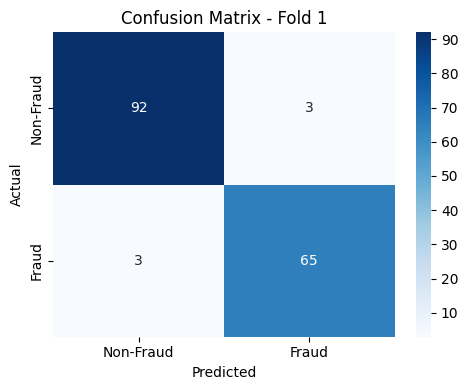


=== Fold 2 ===
Train Accuracy: 0.9831, Test Accuracy (0.5): 0.9509
ROC AUC: 0.9813, PR AUC: 0.9800, Optimal Threshold: 0.53

📊 Classification Report (Threshold = 0.5)
              precision    recall  f1-score   support

           0       0.98      0.94      0.96        95
           1       0.92      0.97      0.94        68

    accuracy                           0.95       163
   macro avg       0.95      0.95      0.95       163
weighted avg       0.95      0.95      0.95       163


📊 Classification Report (Threshold = F1-max)
              precision    recall  f1-score   support

           0       0.98      0.95      0.96        95
           1       0.93      0.97      0.95        68

    accuracy                           0.96       163
   macro avg       0.95      0.96      0.96       163
weighted avg       0.96      0.96      0.96       163



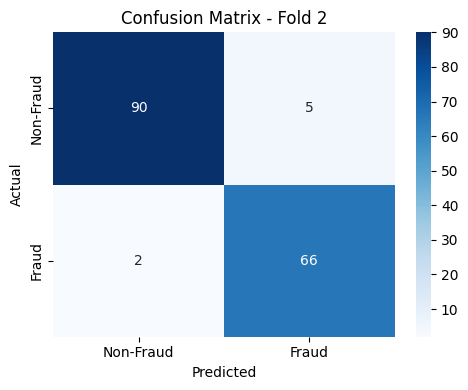


=== Fold 3 ===
Train Accuracy: 0.9738, Test Accuracy (0.5): 0.9383
ROC AUC: 0.9742, PR AUC: 0.9762, Optimal Threshold: 0.48

📊 Classification Report (Threshold = 0.5)
              precision    recall  f1-score   support

           0       0.92      0.98      0.95        95
           1       0.97      0.88      0.92        67

    accuracy                           0.94       162
   macro avg       0.94      0.93      0.94       162
weighted avg       0.94      0.94      0.94       162


📊 Classification Report (Threshold = F1-max)
              precision    recall  f1-score   support

           0       0.96      0.98      0.97        95
           1       0.97      0.94      0.95        67

    accuracy                           0.96       162
   macro avg       0.96      0.96      0.96       162
weighted avg       0.96      0.96      0.96       162



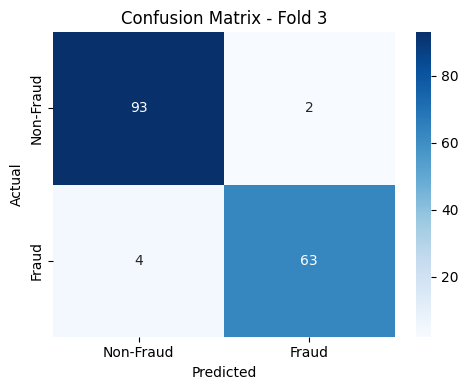


=== Fold 4 ===
Train Accuracy: 0.9785, Test Accuracy (0.5): 0.9630
ROC AUC: 0.9919, PR AUC: 0.9890, Optimal Threshold: 0.72

📊 Classification Report (Threshold = 0.5)
              precision    recall  f1-score   support

           0       0.99      0.95      0.97        94
           1       0.93      0.99      0.96        68

    accuracy                           0.96       162
   macro avg       0.96      0.97      0.96       162
weighted avg       0.96      0.96      0.96       162


📊 Classification Report (Threshold = F1-max)
              precision    recall  f1-score   support

           0       0.98      0.99      0.98        94
           1       0.99      0.97      0.98        68

    accuracy                           0.98       162
   macro avg       0.98      0.98      0.98       162
weighted avg       0.98      0.98      0.98       162



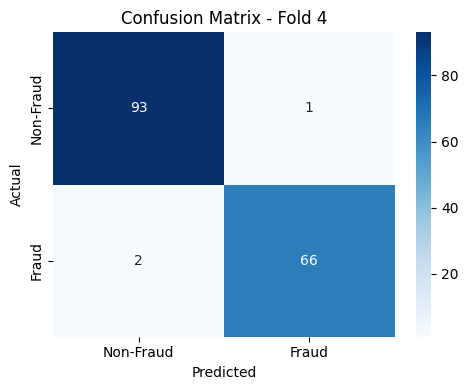


=== Fold 5 ===
Train Accuracy: 0.9800, Test Accuracy (0.5): 0.9321
ROC AUC: 0.9729, PR AUC: 0.9787, Optimal Threshold: 0.65

📊 Classification Report (Threshold = 0.5)
              precision    recall  f1-score   support

           0       0.95      0.94      0.94        94
           1       0.91      0.93      0.92        68

    accuracy                           0.93       162
   macro avg       0.93      0.93      0.93       162
weighted avg       0.93      0.93      0.93       162


📊 Classification Report (Threshold = F1-max)
              precision    recall  f1-score   support

           0       0.95      0.99      0.97        94
           1       0.98      0.93      0.95        68

    accuracy                           0.96       162
   macro avg       0.97      0.96      0.96       162
weighted avg       0.96      0.96      0.96       162



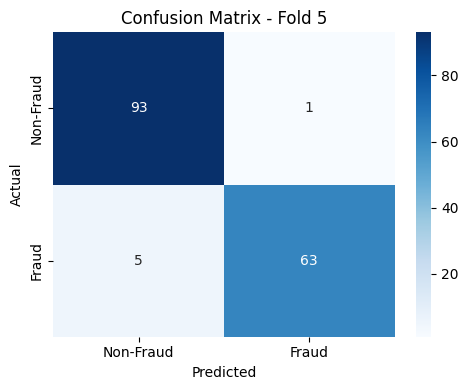


=== Cross-Validated Metrics ===
Mean ROC AUC: 0.9804 ± 0.0067
Mean PR AUC: 0.9811 ± 0.0043
Mean Optimal Threshold: 0.59


In [6]:
# 📦 Imports
import pandas as pd
import numpy as np
from catboost import CatBoostClassifier, Pool
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import (
    classification_report, roc_auc_score, average_precision_score,
    precision_recall_curve, confusion_matrix
)
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
import io

# 📁 Upload CSV from local system
print("📤 Please upload your feature-engineered CSV file")
uploaded = files.upload()
filename = list(uploaded.keys())[0]
df = pd.read_csv(io.BytesIO(uploaded[filename]))

# ✂️ Split features and target
X = df.drop("IsFraud", axis=1)
y = df["IsFraud"]

# 🔁 Stratified K-Fold Setup
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
roc_aucs, pr_aucs, f1_thresholds = [], [], []

# ✅ CatBoost parameters to prevent overfitting
cat_params = {
    "iterations": 1000,
    "learning_rate": 0.05,
    "depth": 4,
    "l2_leaf_reg": 5,
    "random_strength": 1,
    "bagging_temperature": 1,
    "border_count": 64,
    "scale_pos_weight": 1,
    "loss_function": "Logloss",
    "eval_metric": "AUC",
    "verbose": False,
    "random_seed": 42,
    "early_stopping_rounds": 30
}

for fold, (train_idx, val_idx) in enumerate(skf.split(X, y), 1):
    X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
    y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]

    train_pool = Pool(X_train, label=y_train)
    val_pool = Pool(X_val, label=y_val)

    model = CatBoostClassifier(**cat_params)
    model.fit(train_pool, eval_set=val_pool)

    y_proba = model.predict_proba(X_val)[:, 1]
    y_pred_default = (y_proba >= 0.5).astype(int)

    train_acc = np.mean(model.predict(X_train) == y_train)
    test_acc = np.mean(y_pred_default == y_val)

    roc_auc = roc_auc_score(y_val, y_proba)
    pr_auc = average_precision_score(y_val, y_proba)
    roc_aucs.append(roc_auc)
    pr_aucs.append(pr_auc)

    precision, recall, thresholds = precision_recall_curve(y_val, y_proba)
    f1_scores = 2 * (precision * recall) / (precision + recall + 1e-6)
    best_idx = np.argmax(f1_scores)
    best_threshold = thresholds[best_idx]
    f1_thresholds.append(best_threshold)
    y_pred_adjusted = (y_proba >= best_threshold).astype(int)

    print(f"\n=== Fold {fold} ===")
    print(f"Train Accuracy: {train_acc:.4f}, Test Accuracy (0.5): {test_acc:.4f}")
    print(f"ROC AUC: {roc_auc:.4f}, PR AUC: {pr_auc:.4f}, Optimal Threshold: {best_threshold:.2f}")

    print("\n📊 Classification Report (Threshold = 0.5)")
    print(classification_report(y_val, y_pred_default))

    print("\n📊 Classification Report (Threshold = F1-max)")
    print(classification_report(y_val, y_pred_adjusted))

    cm = confusion_matrix(y_val, y_pred_adjusted)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'])
    plt.title(f'Confusion Matrix - Fold {fold}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.tight_layout()
    plt.show()

# 📊 Aggregated Metrics
print("\n=== Cross-Validated Metrics ===")
print(f"Mean ROC AUC: {np.mean(roc_aucs):.4f} ± {np.std(roc_aucs):.4f}")
print(f"Mean PR AUC: {np.mean(pr_aucs):.4f} ± {np.std(pr_aucs):.4f}")
print(f"Mean Optimal Threshold: {np.mean(f1_thresholds):.2f}")

**CatBoost + XGBoost Ensemble**

📤 Please upload your feature-engineered CSV file


Saving feature_engineered_merged.csv to feature_engineered_merged (3).csv


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [11:34:19] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



=== Fold 1 ===
Train Accuracy: 0.9954, Test Accuracy (0.5): 0.9509
ROC AUC: 0.9766, PR AUC: 0.9799, Optimal Threshold: 0.50

📊 Classification Report (Threshold = 0.5)
              precision    recall  f1-score   support

           0       0.97      0.95      0.96        95
           1       0.93      0.96      0.94        68

    accuracy                           0.95       163
   macro avg       0.95      0.95      0.95       163
weighted avg       0.95      0.95      0.95       163


📊 Classification Report (Threshold = F1-max)
              precision    recall  f1-score   support

           0       0.97      0.95      0.96        95
           1       0.93      0.96      0.94        68

    accuracy                           0.95       163
   macro avg       0.95      0.95      0.95       163
weighted avg       0.95      0.95      0.95       163



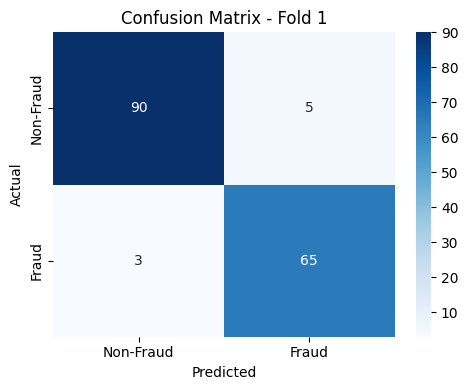

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [11:34:20] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



=== Fold 2 ===
Train Accuracy: 0.9938, Test Accuracy (0.5): 0.9509
ROC AUC: 0.9783, PR AUC: 0.9751, Optimal Threshold: 0.53

📊 Classification Report (Threshold = 0.5)
              precision    recall  f1-score   support

           0       0.98      0.94      0.96        95
           1       0.92      0.97      0.94        68

    accuracy                           0.95       163
   macro avg       0.95      0.95      0.95       163
weighted avg       0.95      0.95      0.95       163


📊 Classification Report (Threshold = F1-max)
              precision    recall  f1-score   support

           0       0.98      0.96      0.97        95
           1       0.94      0.97      0.96        68

    accuracy                           0.96       163
   macro avg       0.96      0.96      0.96       163
weighted avg       0.96      0.96      0.96       163



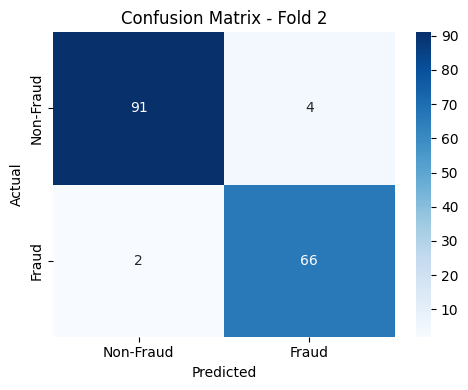

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [11:34:22] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



=== Fold 3 ===
Train Accuracy: 0.9923, Test Accuracy (0.5): 0.9506
ROC AUC: 0.9731, PR AUC: 0.9759, Optimal Threshold: 0.49

📊 Classification Report (Threshold = 0.5)
              precision    recall  f1-score   support

           0       0.95      0.97      0.96        95
           1       0.95      0.93      0.94        67

    accuracy                           0.95       162
   macro avg       0.95      0.95      0.95       162
weighted avg       0.95      0.95      0.95       162


📊 Classification Report (Threshold = F1-max)
              precision    recall  f1-score   support

           0       0.96      0.97      0.96        95
           1       0.95      0.94      0.95        67

    accuracy                           0.96       162
   macro avg       0.96      0.95      0.96       162
weighted avg       0.96      0.96      0.96       162



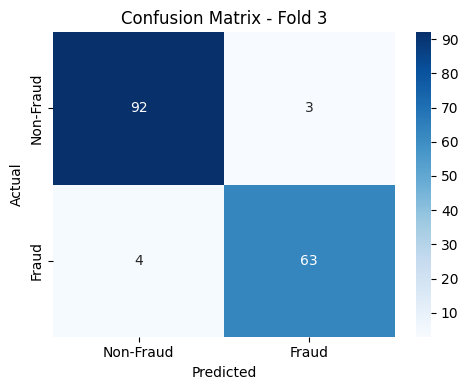

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [11:34:23] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



=== Fold 4 ===
Train Accuracy: 0.9969, Test Accuracy (0.5): 0.9568
ROC AUC: 0.9869, PR AUC: 0.9744, Optimal Threshold: 0.75

📊 Classification Report (Threshold = 0.5)
              precision    recall  f1-score   support

           0       0.99      0.94      0.96        94
           1       0.92      0.99      0.95        68

    accuracy                           0.96       162
   macro avg       0.95      0.96      0.96       162
weighted avg       0.96      0.96      0.96       162


📊 Classification Report (Threshold = F1-max)
              precision    recall  f1-score   support

           0       0.99      0.99      0.99        94
           1       0.99      0.99      0.99        68

    accuracy                           0.99       162
   macro avg       0.99      0.99      0.99       162
weighted avg       0.99      0.99      0.99       162



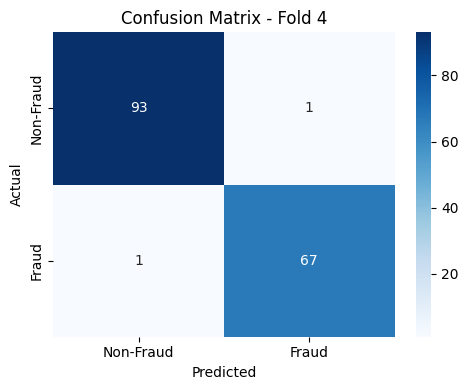

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [11:34:24] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



=== Fold 5 ===
Train Accuracy: 0.9954, Test Accuracy (0.5): 0.9259
ROC AUC: 0.9648, PR AUC: 0.9717, Optimal Threshold: 0.77

📊 Classification Report (Threshold = 0.5)
              precision    recall  f1-score   support

           0       0.95      0.93      0.94        94
           1       0.90      0.93      0.91        68

    accuracy                           0.93       162
   macro avg       0.92      0.93      0.92       162
weighted avg       0.93      0.93      0.93       162


📊 Classification Report (Threshold = F1-max)
              precision    recall  f1-score   support

           0       0.94      0.98      0.96        94
           1       0.97      0.91      0.94        68

    accuracy                           0.95       162
   macro avg       0.95      0.95      0.95       162
weighted avg       0.95      0.95      0.95       162



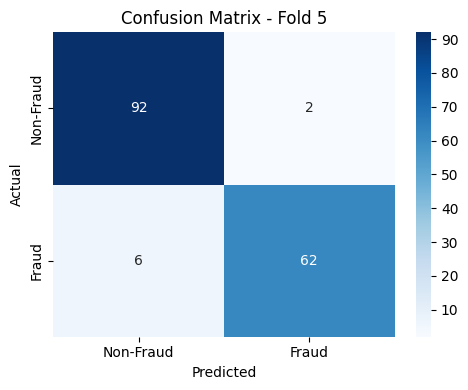


=== Cross-Validated Metrics ===
Mean ROC AUC: 0.9759 ± 0.0072
Mean PR AUC: 0.9754 ± 0.0027
Mean Optimal Threshold: 0.61


In [7]:
# 📦 Imports
import pandas as pd
import numpy as np
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import (
    classification_report, roc_auc_score, average_precision_score,
    precision_recall_curve, confusion_matrix
)
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
import io

# 📁 Upload CSV
print("📤 Please upload your feature-engineered CSV file")
uploaded = files.upload()
filename = list(uploaded.keys())[0]
df = pd.read_csv(io.BytesIO(uploaded[filename]))

# ✂️ Split features and target
X = df.drop("IsFraud", axis=1)
y = df["IsFraud"]

# 🔁 Stratified K-Fold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
roc_aucs, pr_aucs, f1_thresholds = [], [], []

# ✅ Base models
xgb_model = XGBClassifier(
    n_estimators=200, max_depth=3, learning_rate=0.05,
    subsample=0.8, colsample_bytree=0.8, min_child_weight=5,
    reg_alpha=0.5, reg_lambda=2, scale_pos_weight=1,
    use_label_encoder=False, eval_metric="logloss", random_state=42
)

cat_model = CatBoostClassifier(
    iterations=1000, learning_rate=0.05, depth=4,
    l2_leaf_reg=5, random_strength=1, bagging_temperature=1,
    border_count=64, scale_pos_weight=1, loss_function="Logloss",
    eval_metric="AUC", verbose=False, random_seed=42
)

# ✅ Ensemble model
ensemble = VotingClassifier(
    estimators=[("xgb", xgb_model), ("cat", cat_model)],
    voting="soft"
)

# 🔁 Cross-validation loop
for fold, (train_idx, val_idx) in enumerate(skf.split(X, y), 1):
    X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
    y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]

    ensemble.fit(X_train, y_train)
    y_proba = ensemble.predict_proba(X_val)[:, 1]
    y_pred_default = (y_proba >= 0.5).astype(int)

    train_acc = ensemble.score(X_train, y_train)
    test_acc = ensemble.score(X_val, y_val)

    roc_auc = roc_auc_score(y_val, y_proba)
    pr_auc = average_precision_score(y_val, y_proba)
    roc_aucs.append(roc_auc)
    pr_aucs.append(pr_auc)

    precision, recall, thresholds = precision_recall_curve(y_val, y_proba)
    f1_scores = 2 * (precision * recall) / (precision + recall + 1e-6)
    best_idx = np.argmax(f1_scores)
    best_threshold = thresholds[best_idx]
    f1_thresholds.append(best_threshold)
    y_pred_adjusted = (y_proba >= best_threshold).astype(int)

    print(f"\n=== Fold {fold} ===")
    print(f"Train Accuracy: {train_acc:.4f}, Test Accuracy (0.5): {test_acc:.4f}")
    print(f"ROC AUC: {roc_auc:.4f}, PR AUC: {pr_auc:.4f}, Optimal Threshold: {best_threshold:.2f}")

    print("\n📊 Classification Report (Threshold = 0.5)")
    print(classification_report(y_val, y_pred_default))

    print("\n📊 Classification Report (Threshold = F1-max)")
    print(classification_report(y_val, y_pred_adjusted))

    cm = confusion_matrix(y_val, y_pred_adjusted)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'])
    plt.title(f'Confusion Matrix - Fold {fold}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.tight_layout()
    plt.show()

# 📊 Aggregated Metrics
print("\n=== Cross-Validated Metrics ===")
print(f"Mean ROC AUC: {np.mean(roc_aucs):.4f} ± {np.std(roc_aucs):.4f}")
print(f"Mean PR AUC: {np.mean(pr_aucs):.4f} ± {np.std(pr_aucs):.4f}")
print(f"Mean Optimal Threshold: {np.mean(f1_thresholds):.2f}")

**VotingClassifier (XGBoost + CatBoost+LightGBM)**

📤 Please upload your feature-engineered CSV file


Saving feature_engineered_merged.csv to feature_engineered_merged (7).csv

=== Fold 1 ===
Train Accuracy: 0.9985, Test Accuracy (0.5): 0.9571
ROC AUC: 0.9769, PR AUC: 0.9806, Optimal Threshold: 0.50

📊 Classification Report (Threshold = 0.5)
              precision    recall  f1-score   support

           0       0.97      0.96      0.96        95
           1       0.94      0.96      0.95        68

    accuracy                           0.96       163
   macro avg       0.96      0.96      0.96       163
weighted avg       0.96      0.96      0.96       163


📊 Classification Report (Threshold = F1-max)
              precision    recall  f1-score   support

           0       0.98      0.96      0.97        95
           1       0.94      0.97      0.96        68

    accuracy                           0.96       163
   macro avg       0.96      0.96      0.96       163
weighted avg       0.96      0.96      0.96       163



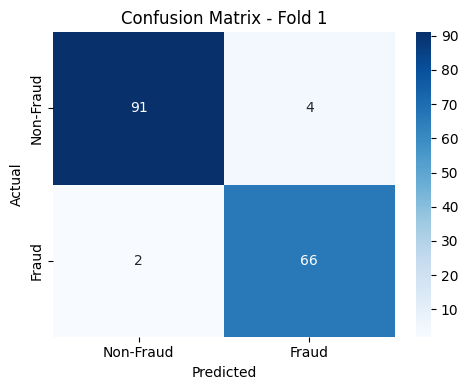


=== Fold 2 ===
Train Accuracy: 0.9954, Test Accuracy (0.5): 0.9509
ROC AUC: 0.9791, PR AUC: 0.9758, Optimal Threshold: 0.52

📊 Classification Report (Threshold = 0.5)
              precision    recall  f1-score   support

           0       0.98      0.94      0.96        95
           1       0.92      0.97      0.94        68

    accuracy                           0.95       163
   macro avg       0.95      0.95      0.95       163
weighted avg       0.95      0.95      0.95       163


📊 Classification Report (Threshold = F1-max)
              precision    recall  f1-score   support

           0       0.98      0.94      0.96        95
           1       0.92      0.97      0.94        68

    accuracy                           0.95       163
   macro avg       0.95      0.95      0.95       163
weighted avg       0.95      0.95      0.95       163



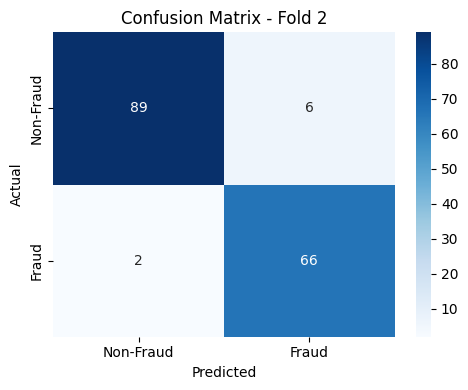


=== Fold 3 ===
Train Accuracy: 0.9954, Test Accuracy (0.5): 0.9506
ROC AUC: 0.9719, PR AUC: 0.9756, Optimal Threshold: 0.49

📊 Classification Report (Threshold = 0.5)
              precision    recall  f1-score   support

           0       0.95      0.97      0.96        95
           1       0.95      0.93      0.94        67

    accuracy                           0.95       162
   macro avg       0.95      0.95      0.95       162
weighted avg       0.95      0.95      0.95       162


📊 Classification Report (Threshold = F1-max)
              precision    recall  f1-score   support

           0       0.96      0.97      0.96        95
           1       0.95      0.94      0.95        67

    accuracy                           0.96       162
   macro avg       0.96      0.95      0.96       162
weighted avg       0.96      0.96      0.96       162



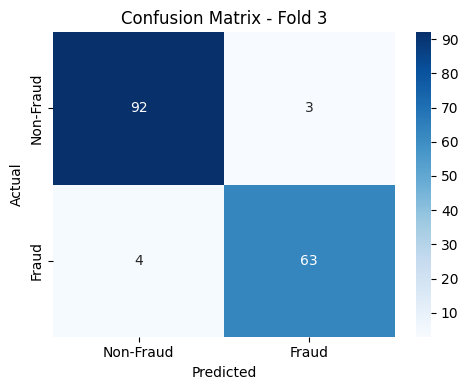


=== Fold 4 ===
Train Accuracy: 0.9969, Test Accuracy (0.5): 0.9568
ROC AUC: 0.9864, PR AUC: 0.9724, Optimal Threshold: 0.79

📊 Classification Report (Threshold = 0.5)
              precision    recall  f1-score   support

           0       0.99      0.94      0.96        94
           1       0.92      0.99      0.95        68

    accuracy                           0.96       162
   macro avg       0.95      0.96      0.96       162
weighted avg       0.96      0.96      0.96       162


📊 Classification Report (Threshold = F1-max)
              precision    recall  f1-score   support

           0       0.99      0.99      0.99        94
           1       0.99      0.99      0.99        68

    accuracy                           0.99       162
   macro avg       0.99      0.99      0.99       162
weighted avg       0.99      0.99      0.99       162



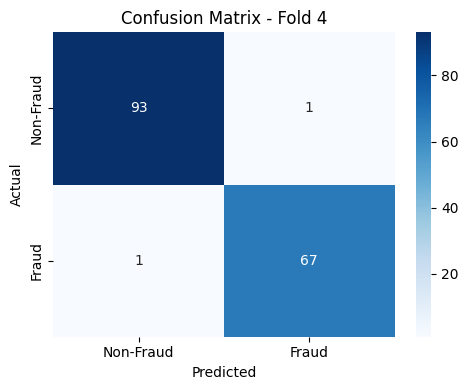


=== Fold 5 ===
Train Accuracy: 0.9954, Test Accuracy (0.5): 0.9321
ROC AUC: 0.9675, PR AUC: 0.9757, Optimal Threshold: 0.78

📊 Classification Report (Threshold = 0.5)
              precision    recall  f1-score   support

           0       0.95      0.94      0.94        94
           1       0.91      0.93      0.92        68

    accuracy                           0.93       162
   macro avg       0.93      0.93      0.93       162
weighted avg       0.93      0.93      0.93       162


📊 Classification Report (Threshold = F1-max)
              precision    recall  f1-score   support

           0       0.94      0.99      0.96        94
           1       0.98      0.91      0.95        68

    accuracy                           0.96       162
   macro avg       0.96      0.95      0.96       162
weighted avg       0.96      0.96      0.96       162



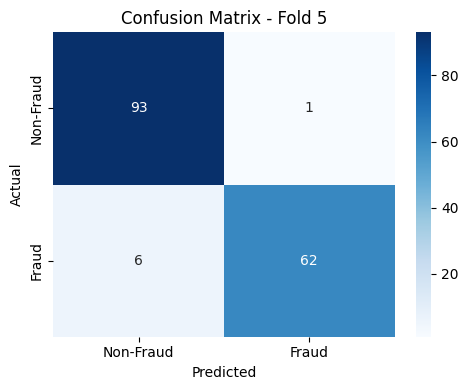


=== Cross-Validated Metrics ===
Mean ROC AUC: 0.9764 ± 0.0064
Mean PR AUC: 0.9760 ± 0.0026
Mean Optimal Threshold: 0.61


In [11]:
# 📦 Imports
import warnings
warnings.filterwarnings("ignore")  # Suppress LightGBM warnings

import pandas as pd
import numpy as np
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import (
    classification_report, roc_auc_score, average_precision_score,
    precision_recall_curve, confusion_matrix
)
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
import io

# 📁 Upload CSV from local system
print("📤 Please upload your feature-engineered CSV file")
uploaded = files.upload()
filename = list(uploaded.keys())[0]
df = pd.read_csv(io.BytesIO(uploaded[filename]))

# ✂️ Split features and target
X = df.drop("IsFraud", axis=1)
y = df["IsFraud"]

# 🔁 Stratified K-Fold Setup
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
roc_aucs, pr_aucs, f1_thresholds = [], [], []

# ✅ Base model configurations
xgb_model = XGBClassifier(
    n_estimators=200, max_depth=3, learning_rate=0.05,
    subsample=0.8, colsample_bytree=0.8, min_child_weight=5,
    reg_alpha=0.5, reg_lambda=2, scale_pos_weight=1,
    use_label_encoder=False, eval_metric="logloss", random_state=42
)

cat_model = CatBoostClassifier(
    iterations=1000, learning_rate=0.05, depth=4,
    l2_leaf_reg=5, random_strength=1, bagging_temperature=1,
    border_count=64, scale_pos_weight=1, loss_function="Logloss",
    eval_metric="AUC", verbose=False, random_seed=42
)

lgb_model = LGBMClassifier(
    n_estimators=300, learning_rate=0.03,
    max_depth=-1, num_leaves=64, min_child_samples=20,
    min_split_gain=0.001, subsample=0.9, colsample_bytree=0.9,
    reg_alpha=0.1, reg_lambda=1, scale_pos_weight=1,
    verbose=-1, random_state=42
)

# ✅ Ensemble model
ensemble = VotingClassifier(
    estimators=[("xgb", xgb_model), ("cat", cat_model), ("lgb", lgb_model)],
    voting="soft"
)

# 🔁 Cross-validation loop
for fold, (train_idx, val_idx) in enumerate(skf.split(X, y), 1):
    X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
    y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]

    ensemble.fit(X_train, y_train)
    y_proba = ensemble.predict_proba(X_val)[:, 1]
    y_pred_default = (y_proba >= 0.5).astype(int)

    train_acc = ensemble.score(X_train, y_train)
    test_acc = ensemble.score(X_val, y_val)

    roc_auc = roc_auc_score(y_val, y_proba)
    pr_auc = average_precision_score(y_val, y_proba)
    roc_aucs.append(roc_auc)
    pr_aucs.append(pr_auc)

    precision, recall, thresholds = precision_recall_curve(y_val, y_proba)
    f1_scores = 2 * (precision * recall) / (precision + recall + 1e-6)
    best_idx = np.argmax(f1_scores)
    best_threshold = thresholds[best_idx]
    f1_thresholds.append(best_threshold)
    y_pred_adjusted = (y_proba >= best_threshold).astype(int)

    print(f"\n=== Fold {fold} ===")
    print(f"Train Accuracy: {train_acc:.4f}, Test Accuracy (0.5): {test_acc:.4f}")
    print(f"ROC AUC: {roc_auc:.4f}, PR AUC: {pr_auc:.4f}, Optimal Threshold: {best_threshold:.2f}")

    print("\n📊 Classification Report (Threshold = 0.5)")
    print(classification_report(y_val, y_pred_default))

    print("\n📊 Classification Report (Threshold = F1-max)")
    print(classification_report(y_val, y_pred_adjusted))

    cm = confusion_matrix(y_val, y_pred_adjusted)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'])
    plt.title(f'Confusion Matrix - Fold {fold}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.tight_layout()
    plt.show()

# 📊 Aggregated Metrics
print("\n=== Cross-Validated Metrics ===")
print(f"Mean ROC AUC: {np.mean(roc_aucs):.4f} ± {np.std(roc_aucs):.4f}")
print(f"Mean PR AUC: {np.mean(pr_aucs):.4f} ± {np.std(pr_aucs):.4f}")
print(f"Mean Optimal Threshold: {np.mean(f1_thresholds):.2f}")

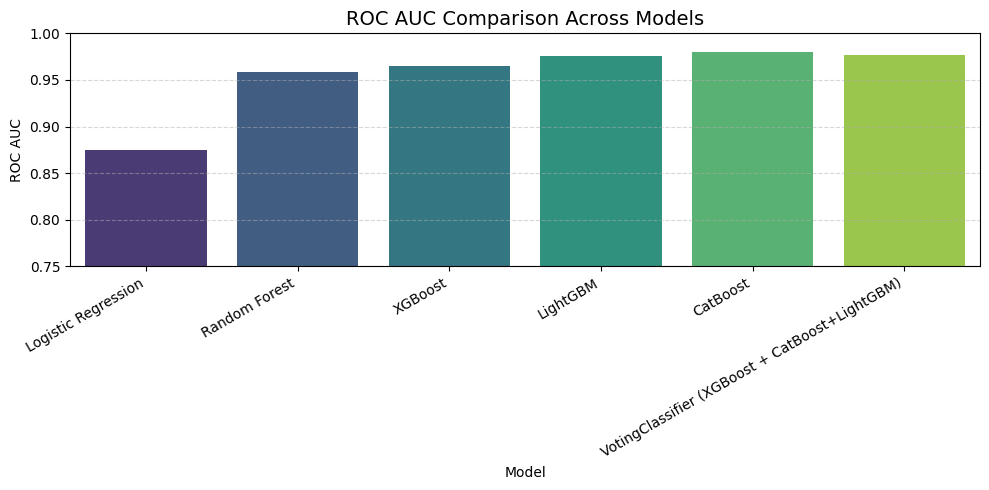

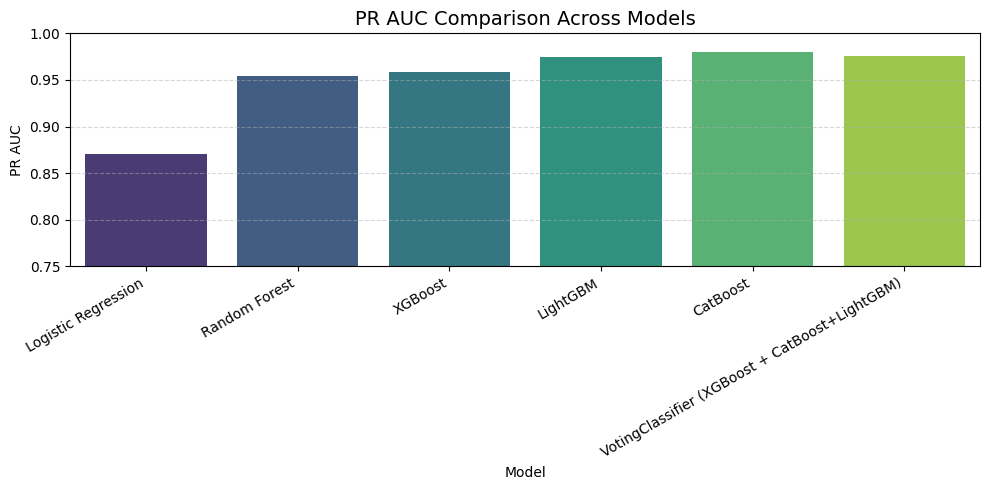

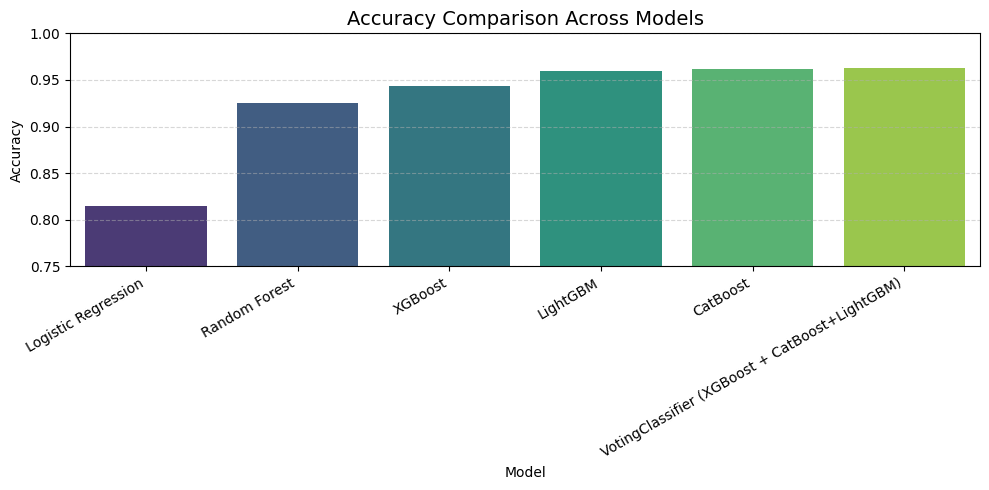

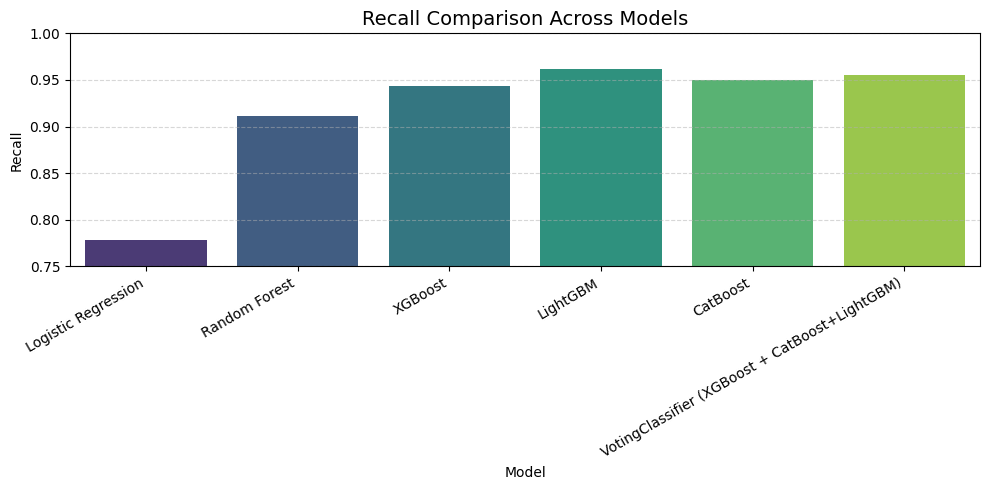

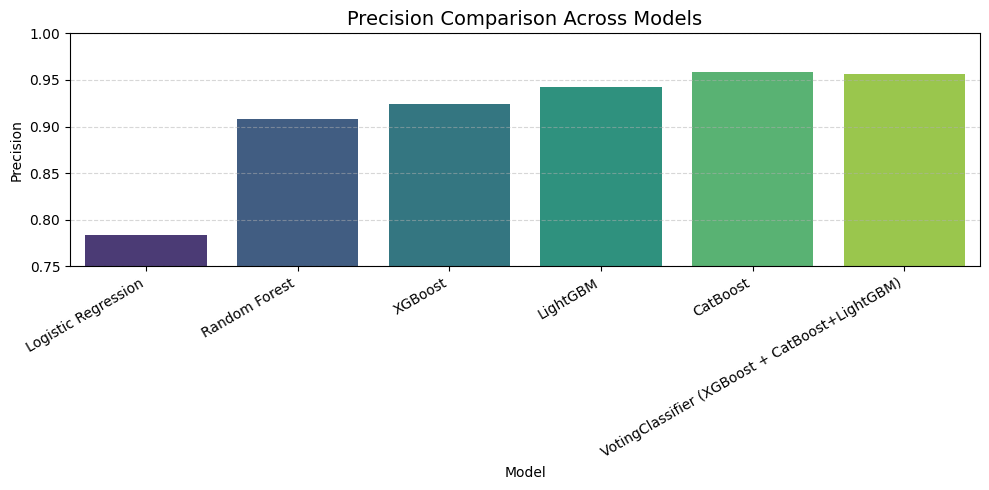

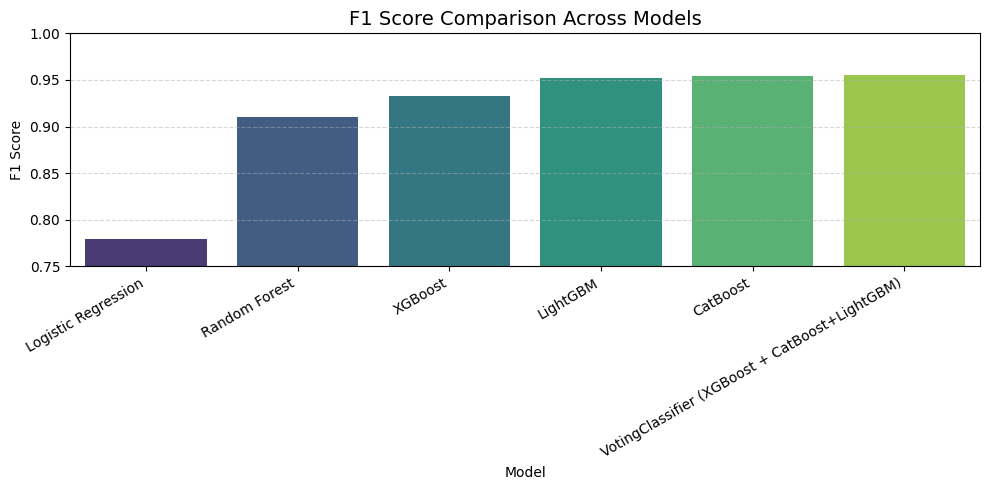

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 📁 Your summary data
data = {
    "Model": [
        "Logistic Regression", "Random Forest", "XGBoost",
        "LightGBM", "CatBoost", "VotingClassifier (XGBoost + CatBoost+LightGBM)"
    ],
    "ROC AUC": [0.8750, 0.9581, 0.9649, 0.9757, 0.9799, 0.9764],
    "PR AUC": [0.8701, 0.9542, 0.9583, 0.9750, 0.9805, 0.9760],
    "Accuracy": [0.8153, 0.9249, 0.9434, 0.9594, 0.9618, 0.9631],
    "Recall": [0.7787, 0.9115, 0.9439, 0.9616, 0.9499, 0.9557],
    "Precision": [0.7838, 0.9085, 0.9240, 0.9425, 0.9585, 0.9567],
    "F1 Score": [0.7789, 0.9100, 0.9331, 0.9518, 0.9540, 0.9557]
}

df = pd.DataFrame(data)

# 📊 Plotting function
def plot_metric(metric, title):
    plt.figure(figsize=(10, 5))
    sns.barplot(x="Model", y=metric, data=df, palette="viridis")
    plt.title(f"{title} Comparison Across Models", fontsize=14)
    plt.ylabel(metric)
    plt.xticks(rotation=30, ha='right')
    plt.ylim(0.75, 1.0)
    plt.grid(axis='y', linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()

# 🔁 Generate plots for each metric
for metric in ["ROC AUC", "PR AUC", "Accuracy", "Recall", "Precision", "F1 Score"]:
    plot_metric(metric, metric)